# Coercion clustering techniques krok 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/home/wmoszczy/2/Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
## 440 klientów według 7 cech

data.shape

(440, 8)

In [4]:
data.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [5]:
data.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

## NORMALIZACJA

In [6]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


##  dendrogram, który pomoże nam określić liczbę klastrów dla tego konkretnego problemu

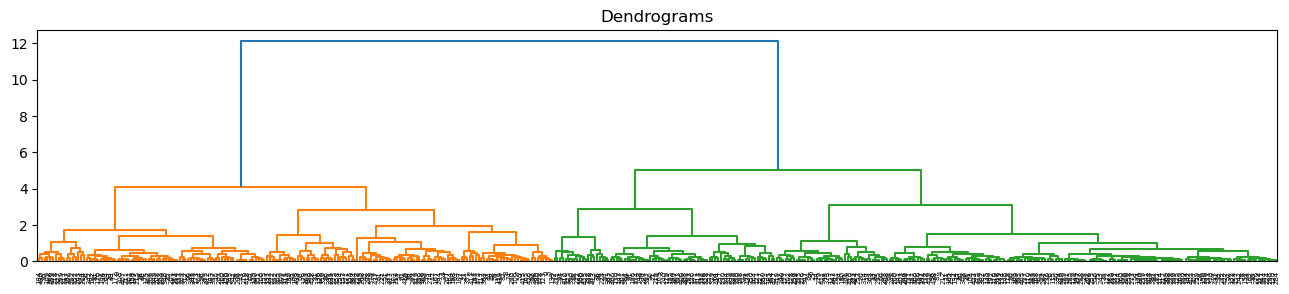

In [7]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16, 3))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

Oś x zawiera próbki, a oś y przedstawia odległość między tymi próbkami. Linia pionowa z maksymalną odległością jest linią niebieską, dlatego możemy ustalić próg 6 i wyciąć dendrogram:

## Co to za próbki?

In [8]:
data2 = data.head(20)

In [9]:
data_scaled2 = normalize(data2)
data_scaled2 = pd.DataFrame(data_scaled2, columns=data2.columns)
data_scaled2

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294
5,0.000146,0.000218,0.684944,0.600972,0.372997,0.048462,0.130615,0.105583
6,0.000136,0.000204,0.824476,0.217508,0.474247,0.032636,0.213496,0.037056
7,0.000145,0.000217,0.548036,0.358368,0.681593,0.120685,0.240141,0.185547
8,0.000105,0.000315,0.625457,0.382637,0.649477,0.044578,0.179991,0.078667
9,0.000083,0.000125,0.250143,0.462010,0.786371,0.048271,0.309242,0.087379


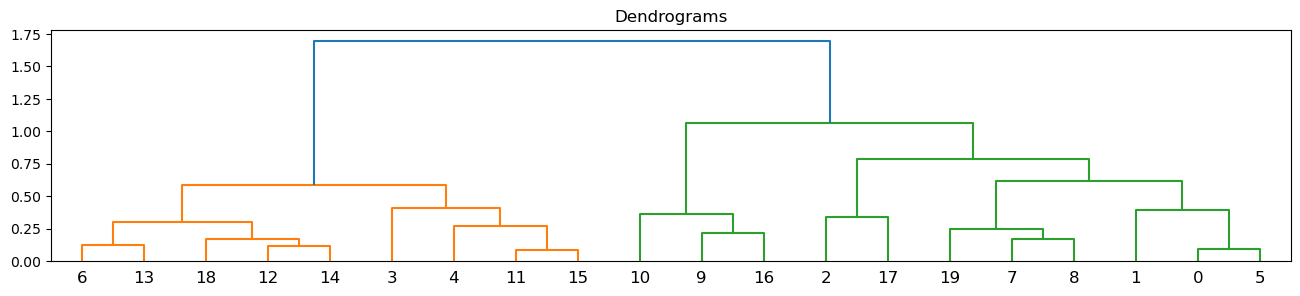

In [10]:
plt.figure(figsize=(16, 3))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled2, method='ward'))

# Analizujemy próbkę ('transakcji') 6 i 13

In [11]:
data_scaled2.loc[[6, 13], :]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
6,0.000136,0.000204,0.824476,0.217508,0.474247,0.032636,0.213496,0.037056
13,0.000072,0.000108,0.765560,0.223999,0.540586,0.111675,0.242004,0.021722


# Analizujemy próbkę ('transakcji') 11 i 15

In [12]:
data_scaled2.loc[[11, 15], :]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
11,0.000142,0.000214,0.936369,0.080061,0.322166,0.101144,0.039104,0.035401
15,0.000090,0.000271,0.927421,0.100765,0.345623,0.035910,0.087197,0.037267


## Czy można takie coś zrobić dla klientów a nie dla transakcji?

Tworzę grupę 100 fikcyjnych klientów

In [13]:
data7 = data

In [14]:
data7['ID_custom1'] = (data7['Fresh']*4)+(data7['Frozen']*3)+ data7['Grocery']+(data7['Milk']/2)

In [15]:
data7['ID_customer'] = pd.qcut(data7['ID_custom1'],100)

In [16]:
data7['ID_customer'].value_counts()

(2877.499, 5526.425]     5
(34396.35, 34830.195]    5
(36826.725, 37801.02]    5
(40883.23, 41588.015]    5
(43585.585, 44497.68]    5
                        ..
(62602.0, 63582.68]      4
(23490.58, 24485.7]      4
(64894.4, 65359.665]     4
(65359.665, 68002.06]    4
(53507.5, 53856.245]     4
Name: ID_customer, Length: 100, dtype: int64

### Koduje przedziały robiąc z nich ID

In [17]:
data7['ID_customer'] = pd.Categorical(data7['ID_customer']).codes
data7['ID_customer'].value_counts()

61    5
10    5
30    5
51    5
58    5
     ..
62    4
37    4
3     4
1     4
54    4
Name: ID_customer, Length: 100, dtype: int64

In [18]:
#data7.reset_index()
#data7 = data7.set_index(data7.ID_customer) 
#del data7.ID_customer
#del data7.ID_custom2
#del data7.ID_custom1

data7

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,ID_custom1,ID_customer
0,2,3,12669,9656,7561,214,2674,1338,63707.0,61
1,2,3,7057,9810,9568,1762,3293,1776,47987.0,46
2,2,3,6353,8808,7684,2405,3516,7844,44715.0,42
3,1,3,13265,1196,4221,6404,507,1788,77091.0,68
4,2,3,22615,5410,7198,3915,1777,5185,112108.0,84
...,...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,180269.5,95
436,1,3,39228,1431,764,4510,93,2346,171921.5,94
437,2,3,14531,15488,30243,437,14841,1867,97422.0,79
438,1,3,10290,1981,2232,1038,168,2125,47496.5,45


In [19]:
data7.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'ID_custom1', 'ID_customer'],
      dtype='object')

In [20]:
del data7['ID_custom1']

## TABELA PRZESTAWNA OPARTA NA DOMINANCIE

In [21]:
PA7 = data7.pivot_table(index=['ID_customer'],
               values=['Channel',
                       'Region',
                       'Fresh',
                       'Milk',
                       'Grocery',
                       'Frozen',
                       'Detergents_Paper',
                       'Delicassen'],
               aggfunc='mean').reset_index()

PA7

,ID_customer,Channel,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Region
0,0,1.00,195.80,124.60,440.20,354.40,1296.60,562.80,2.6
1,1,1.00,135.00,360.00,523.25,575.00,1981.75,831.25,2.5
2,2,1.00,417.40,1120.40,330.80,466.20,4173.20,3222.00,3.0
3,3,1.25,489.25,1074.50,859.50,372.50,3535.25,3315.75,3.0
4,4,1.00,925.00,2523.75,1228.75,563.75,2694.75,2910.50,2.5
...,...,...,...,...,...,...,...,...,...
95,95,1.00,1217.00,432.75,39472.25,4360.25,5154.25,3840.75,3.0
96,96,1.25,5333.50,10902.00,30254.50,10282.75,27805.75,18779.50,2.5
97,97,1.20,1344.40,6213.80,46268.60,4969.40,16300.20,11363.60,2.2
98,98,1.25,3800.00,6648.25,53197.50,10558.50,16875.75,15720.25,2.5


## NORMALIZACJA PA7

In [22]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler (feature_range = (0, 1)) 

PA8 = PA7

PA8[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']] = scaler.fit_transform (PA8[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']])

In [23]:
PA8

,ID_customer,Channel,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Region
0,0,0.00,0.004695,0.000000,0.001682,0.000000,0.000000,0.000000,0.733333
1,1,0.00,0.000000,0.021842,0.002959,0.008016,0.025846,0.013577,0.666667
2,2,0.00,0.021807,0.092397,0.000000,0.004062,0.108513,0.134494,1.000000
3,3,0.25,0.027355,0.088138,0.008128,0.000658,0.084448,0.139235,1.000000
4,4,0.00,0.061003,0.222609,0.013804,0.007607,0.052742,0.118739,0.666667
...,...,...,...,...,...,...,...,...,...
95,95,0.00,0.083551,0.028592,0.601715,0.145555,0.145521,0.165788,1.000000
96,96,0.25,0.401422,1.000000,0.460012,0.360753,1.000000,0.921341,0.666667
97,97,0.20,0.093389,0.564997,0.706194,0.167689,0.565978,0.546269,0.466667
98,98,0.25,0.283007,0.605308,0.812711,0.370772,0.587690,0.766614,0.666667


##  dendrogram, który pomoże nam określić liczbę klastrów dla tego konkretnego problemu

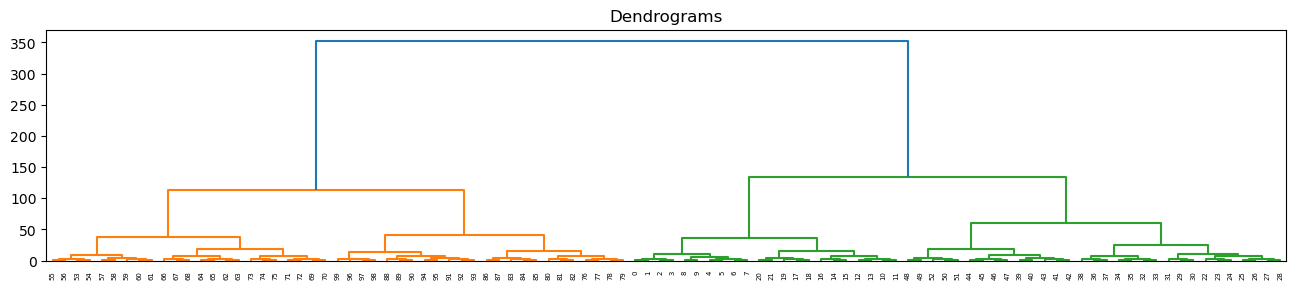

In [24]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16, 3))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(PA8, method='ward'))

# Analizujemy próbkę ('klientów')  13 i 14

In [25]:
PA8.loc[[13, 14], :]

,ID_customer,Channel,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Region
13,13,0.50,0.131793,0.283454,0.026106,0.021487,0.230313,0.278207,1.000000
14,14,0.25,0.043494,0.210524,0.028493,0.045614,0.162223,0.284997,0.666667


# Analizujemy próbkę ('klientów') 5 i 6

In [26]:
PA8.loc[[5, 6], :]

,ID_customer,Channel,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Region
5,5,0.2,0.045652,0.192087,0.013962,0.006976,0.134082,0.171667,0.600000
6,6,0.0,0.070404,0.033092,0.015003,0.023249,0.123435,0.154724,0.666667


# Analizujemy próbkę ('klientów') 13 i 6

In [27]:
PA8.loc[[13, 6], :]

,ID_customer,Channel,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Region
13,13,0.5,0.131793,0.283454,0.026106,0.021487,0.230313,0.278207,1.000000
6,6,0.0,0.070404,0.033092,0.015003,0.023249,0.123435,0.154724,0.666667


# Klienci zostali przypisani -- TWORZYMY 3 KLASTRY

DLACZEGO TRZY ---> BO W POŁOWIE OSI Y jest wartość 25/2 = 13 
na wysokości 13 są 3 gałęzie

In [39]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
PA8['cluster']= cluster.fit_predict(PA8)

In [40]:
PA8

,ID_customer,Channel,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Region,cluster
0,0,0.00,0.004695,0.000000,0.001682,0.000000,0.000000,0.000000,0.733333,2
1,1,0.00,0.000000,0.021842,0.002959,0.008016,0.025846,0.013577,0.666667,2
2,2,0.00,0.021807,0.092397,0.000000,0.004062,0.108513,0.134494,1.000000,2
3,3,0.25,0.027355,0.088138,0.008128,0.000658,0.084448,0.139235,1.000000,2
4,4,0.00,0.061003,0.222609,0.013804,0.007607,0.052742,0.118739,0.666667,2
...,...,...,...,...,...,...,...,...,...,...
95,95,0.00,0.083551,0.028592,0.601715,0.145555,0.145521,0.165788,1.000000,0
96,96,0.25,0.401422,1.000000,0.460012,0.360753,1.000000,0.921341,0.666667,0
97,97,0.20,0.093389,0.564997,0.706194,0.167689,0.565978,0.546269,0.466667,0
98,98,0.25,0.283007,0.605308,0.812711,0.370772,0.587690,0.766614,0.666667,0


In [41]:
PA8.columns

Index(['ID_customer', 'Channel', 'Delicassen', 'Detergents_Paper', 'Fresh',
       'Frozen', 'Grocery', 'Milk', 'Region', 'cluster'],
      dtype='object')

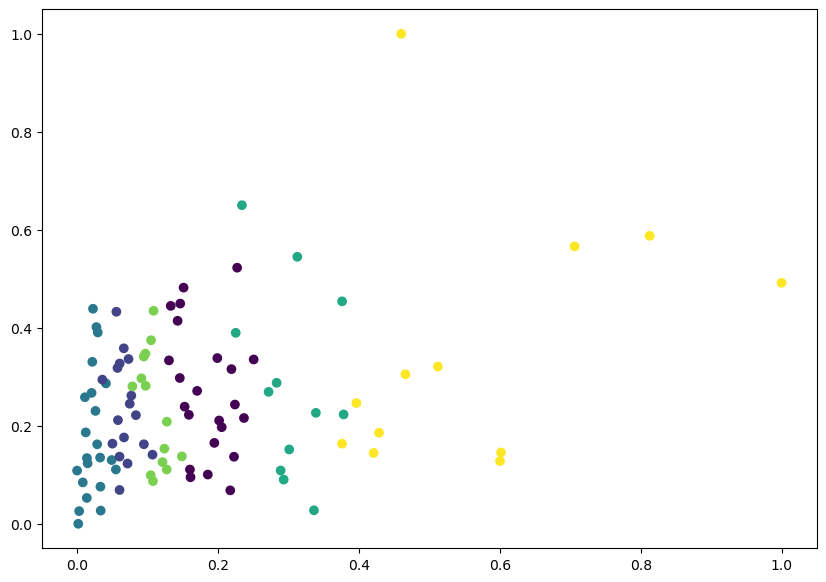

In [38]:
plt.figure(figsize=(10, 7))  
plt.scatter(PA8['Fresh'], PA8['Grocery'], c=cluster.labels_) 

MAMY TUTAJ 8 WYMIARÓW PORÓWNAŃ, gdyby były dwa wymiary byłoby lepie widać, że mechanizm działa dobrze 

# KLASTROWNANIE DLA DWÓCH PRODUKTÓW

In [42]:
PA8.columns

Index(['ID_customer', 'Channel', 'Delicassen', 'Detergents_Paper', 'Fresh',
       'Frozen', 'Grocery', 'Milk', 'Region', 'cluster'],
      dtype='object')

In [55]:
X = PA8[['ID_customer', 'Grocery', 'Milk']].values
X

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.58457929e-02, 1.35773153e-02],
       [2.00000000e+00, 1.08513476e-01, 1.34493563e-01],
       [3.00000000e+00, 8.44482000e-02, 1.39235129e-01],
       [4.00000000e+00, 5.27421664e-02, 1.18738921e-01],
       [5.00000000e+00, 1.34082006e-01, 1.71667438e-01],
       [6.00000000e+00, 1.23434739e-01, 1.54724243e-01],
       [7.00000000e+00, 1.86471464e-01, 1.34726216e-01],
       [8.00000000e+00, 2.69303241e-02, 1.08105169e-01],
       [9.00000000e+00, 7.57625197e-02, 1.45519284e-01],
       [1.00000000e+01, 2.58325899e-01, 3.62483215e-01],
       [1.10000000e+01, 1.35053368e-01, 1.46821634e-01],
       [1.20000000e+01, 2.67077594e-01, 3.07384957e-01],
       [1.30000000e+01, 2.30312930e-01, 2.78207258e-01],
       [1.40000000e+01, 1.62223232e-01, 2.84997180e-01],
       [1.50000000e+01, 3.30512295e-01, 2.08679468e-01],
       [1.60000000e+01, 1.30064525e-01, 4.45681888e-02],
       [1.70000000e+01, 4.01476

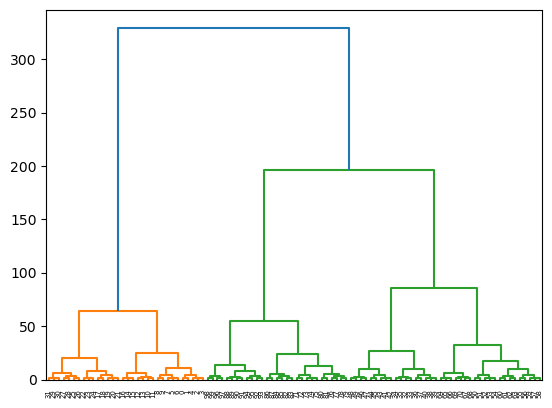

In [56]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [57]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

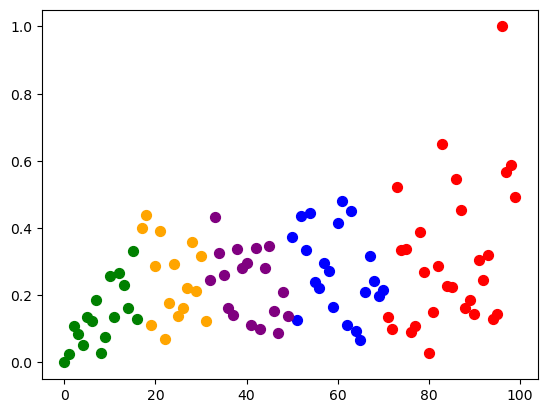

In [58]:
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.scatter(X[labels==3, 0], X[labels==3, 1], s=50, marker='o', color='purple')
plt.scatter(X[labels==4, 0], X[labels==4, 1], s=50, marker='o', color='orange')
plt.show()

## WYBÓR WŁAŚCIWEJ METODY POMIARU PODOBIEŃSTWA

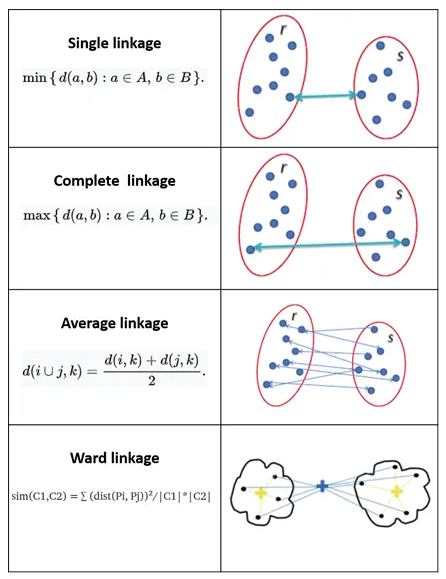

WYBÓR: 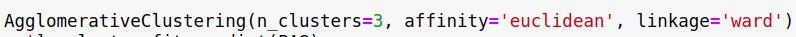